In [11]:
!nvidia-smi

Fri Sep  8 03:42:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    50W / 350W |  26901MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [6]:
import cupy
import cupy.linalg
import cupyx.scipy
import cupyx.scipy.linalg
import cupy as cp
import time
import numpy as np

In [7]:
from matplotlib import pyplot as plt

In [8]:
lu_cal_time = np.array([])
qr_cal_time = np.array([])

for j in range(1,1000):

  # LU Decomposition
  start_time = time.time()

  for i in range(1, 1000):
    cp.random.seed(i)
    A = cp.random.rand(j, j)
    P, L, U = cupyx.scipy.linalg.lu(A)

  print("LU Decomposition", j, "x",j, "matrix ---", time.time() - start_time, "sec")
  lu_cal_time = cp.append(lu_cal_time, cp.array([time.time() - start_time]))


  # QR Decomposition
  start_time = time.time()

  for i in range(1, 1000):
      cp.random.seed(i)
      A = cp.random.rand(j, j)
      Q, R = cupy.linalg.qr(A)

  print("QR Decomposition", j, "x",j,"matrix ---", time.time() - start_time, "sec")
  qr_cal_time = cp.append(qr_cal_time, cp.array([time.time() - start_time]))

LU Decomposition 1 x 1 matrix --- 0.8975334167480469 sec
QR Decomposition 1 x 1 matrix --- 0.5087566375732422 sec
LU Decomposition 2 x 2 matrix --- 0.8346998691558838 sec
QR Decomposition 2 x 2 matrix --- 0.45470714569091797 sec
LU Decomposition 3 x 3 matrix --- 0.818434476852417 sec
QR Decomposition 3 x 3 matrix --- 0.4594447612762451 sec
LU Decomposition 4 x 4 matrix --- 0.8210499286651611 sec
QR Decomposition 4 x 4 matrix --- 0.46170496940612793 sec
LU Decomposition 5 x 5 matrix --- 0.8140702247619629 sec
QR Decomposition 5 x 5 matrix --- 0.46206140518188477 sec
LU Decomposition 6 x 6 matrix --- 0.8292651176452637 sec
QR Decomposition 6 x 6 matrix --- 0.4734032154083252 sec
LU Decomposition 7 x 7 matrix --- 0.8181252479553223 sec
QR Decomposition 7 x 7 matrix --- 0.45574378967285156 sec
LU Decomposition 8 x 8 matrix --- 0.8289687633514404 sec
QR Decomposition 8 x 8 matrix --- 0.4556546211242676 sec
LU Decomposition 9 x 9 matrix --- 0.8170545101165771 sec
QR Decomposition 9 x 9 matri

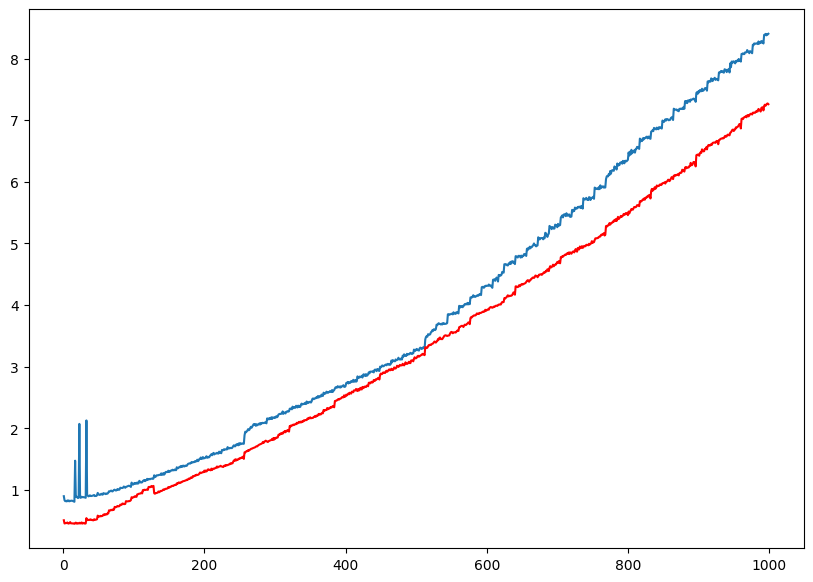

In [9]:
x = np.arange(1,1000)
y_lu = lu_cal_time.get()
y_qr = qr_cal_time.get()
plt.figure(figsize=(10,7))
plt.plot(x, y_lu, x, y_qr, 'r-')

In [10]:
for i in range(1, 999):
  if lu_cal_time[i]<qr_cal_time[i]:
    print(i,"x", i, "- lu is better at matrix decomposition")
